In [1]:
import pandas as pd
import numpy as np
from scipy.io import mmread, mmwrite
import scipy.sparse as sparse

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [32]:
share_anno = pd.read_table('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/SHARE-seq/brain/GSM4156599_brain_celltype.txt.gz')

In [34]:
share_anno.celltype.value_counts()

IN01     591
EN01     327
EN02     239
EN03     235
EN04     216
EN05     191
MX       185
IN02     182
P1       153
A1.E1    137
EN06     132
OG1      130
IN03     113
NSC      106
EN07      93
EN08      79
EN09      67
IN04      66
IN05      51
Name: celltype, dtype: int64

In [5]:
folder = '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/MouseAtlas' 

In [4]:
# Read anno for ATAC
atac_anno = pd.read_table('%s/ATAC/cell_metadata.tissue_freq_filtered.txt' % folder).set_index('cell')
atac_anno = atac_anno[atac_anno.tissue.isin(['WholeBrain', 'PreFrontalCortex', 'Cerebellum'])]

In [11]:
atac_anno.shape

(16874, 11)

In [6]:
atac_anno.tissue.value_counts()

WholeBrain          8705
PreFrontalCortex    5916
Cerebellum          2253
Name: tissue, dtype: int64

In [7]:
len(atac_anno.cell_label.value_counts())

13

In [9]:
atac_anno.cell_label.value_counts()

Cerebellar granule cells    4095
Ex. neurons CPN             1830
Inhibitory neurons          1806
Astrocytes                  1663
Oligodendrocytes            1555
Ex. neurons CThPN           1538
Ex. neurons SCPN            1463
Collisions                   770
Unknown                      562
SOM+ Interneurons            552
Microglia                    417
Purkinje cells               317
Endothelial II cells         306
Name: cell_label, dtype: int64

In [10]:
pd.crosstab(atac_anno.tissue, atac_anno.cell_label)

cell_label        Astrocytes  Cerebellar granule cells  Collisions  \
tissue                                                               
Cerebellum               363                      1091         104   
PreFrontalCortex         551                         0         177   
WholeBrain               749                      3004         489   

cell_label        Endothelial II cells  Ex. neurons CPN  Ex. neurons CThPN  \
tissue                                                                       
Cerebellum                          68                0                  0   
PreFrontalCortex                    77             1391                995   
WholeBrain                         161              439                543   

cell_label        Ex. neurons SCPN  Inhibitory neurons  Microglia  \
tissue                                                              
Cerebellum                       0                 281         29   
PreFrontalCortex              1160                 320        197   
WholeBrain                     303                1205        191   

cell_label        Oligodendrocytes  Purkinje cells  SOM+ Interneurons  Unknown  
tissue                                                                          
Cerebellum                     128             122                 18       49  
PreFrontalCortex               458               0                386      204  
WholeBrain                     969             195                148      309

In [6]:
# Read anno for RNA FACS
rna_facs_anno = pd.read_csv('%s/RNA/annotations_facs.csv' % folder).set_index('cell')
rna_facs_anno = rna_facs_anno[rna_facs_anno.tissue.isin(['Brain_Non-Myeloid', 'Brain_Myeloid'])]

/tmp/ipykernel_417411/1197192179.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  rna_facs_anno = pd.read_csv('%s/RNA/annotations_facs.csv' % folder).set_index('cell')


In [17]:
rna_facs_anno.subtissue.value_counts()

Striatum       2284
Cortex         2165
Hippocampus    2090
Cerebellum     1317
Name: subtissue, dtype: int64

In [20]:
rna_facs_anno.free_annotation.value_counts()

excitatory neurons and some neuronal stem cells    194
inhibitory neurons                                  87
Name: free_annotation, dtype: int64

In [21]:
rna_facs_anno.cell_ontology_class.value_counts()

microglial cell                   4394
oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
macrophage                          61
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64

In [30]:
pd.crosstab(rna_facs_anno.tissue, rna_facs_anno.cell_ontology_class)

cell_ontology_class  Bergmann glial cell  astrocyte  brain pericyte  \
tissue                                                                
Brain_Myeloid                          0          0               0   
Brain_Non-Myeloid                     40        432             156   

cell_ontology_class  endothelial cell  macrophage  microglial cell  neuron  \
tissue                                                                       
Brain_Myeloid                       0          61             4394       0   
Brain_Non-Myeloid                 715           0                0     281   

cell_ontology_class  oligodendrocyte  oligodendrocyte precursor cell  
tissue                                                                
Brain_Myeloid                      0                               0  
Brain_Non-Myeloid               1574                             203

In [29]:
pd.crosstab(rna_facs_anno.subtissue, rna_facs_anno.cell_ontology_class)

cell_ontology_class  Bergmann glial cell  astrocyte  brain pericyte  \
subtissue                                                             
Cerebellum                            39          8              41   
Cortex                                 0        258              63   
Hippocampus                            0         90              38   
Striatum                               1         76              14   

cell_ontology_class  endothelial cell  macrophage  microglial cell  neuron  \
subtissue                                                                    
Cerebellum                        188          38              726     100   
Cortex                            142          10             1006      56   
Hippocampus                       273           9             1105      19   
Striatum                          112           4             1557     106   

cell_ontology_class  oligodendrocyte  oligodendrocyte precursor cell  
subtissue                                                             
Cerebellum                       163                              14  
Cortex                           579                              51  
Hippocampus                      461                              95  
Striatum                         371                              43

In [94]:
pd.crosstab(rna_facs_anno.free_annotation, rna_facs_anno.cell_ontology_class)

cell_ontology_class                              neuron
free_annotation                                        
excitatory neurons and some neuronal stem cells     194
inhibitory neurons                                   87

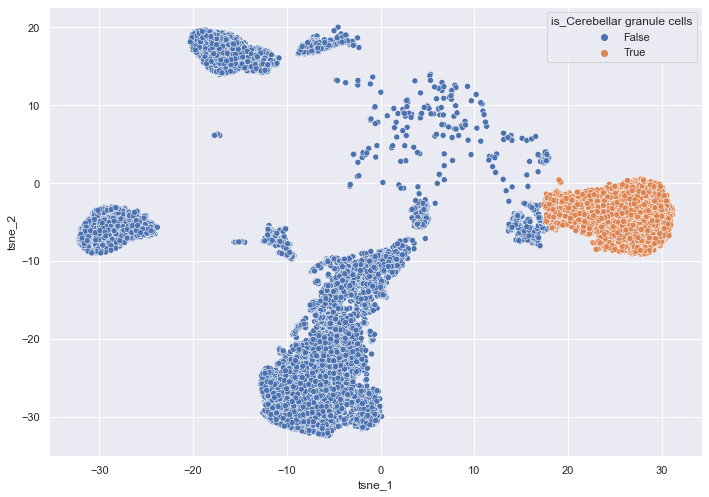

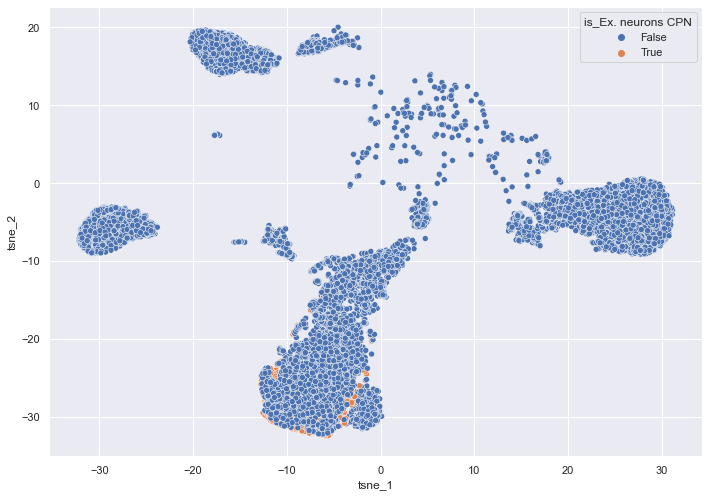

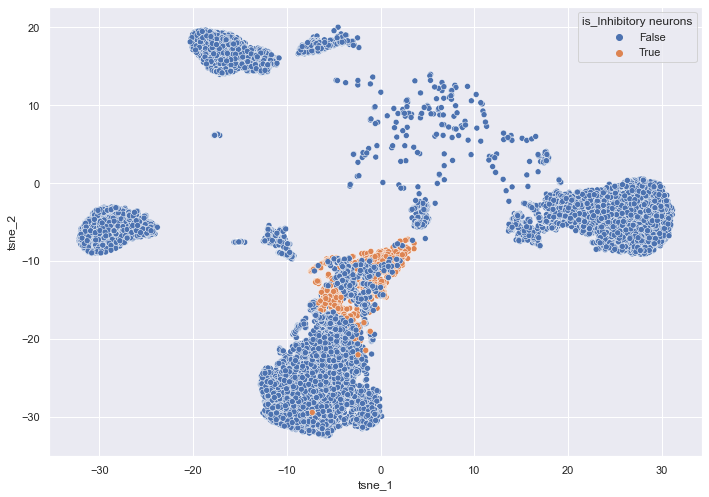

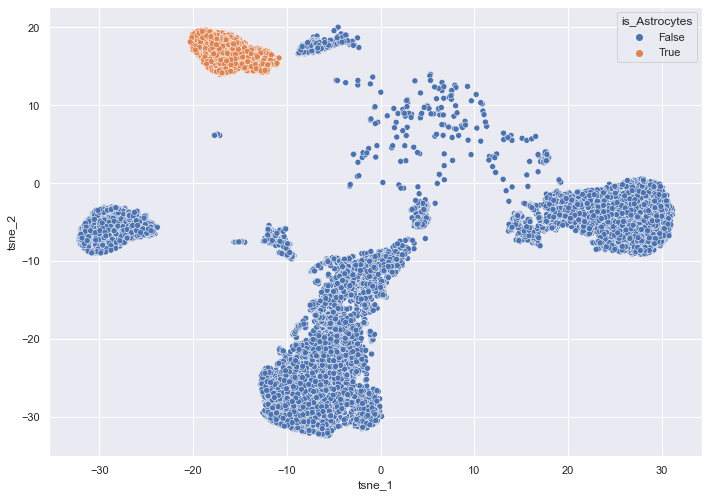

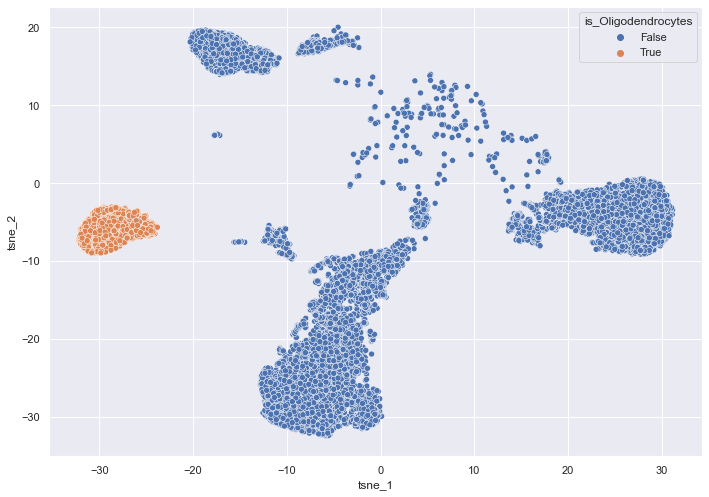

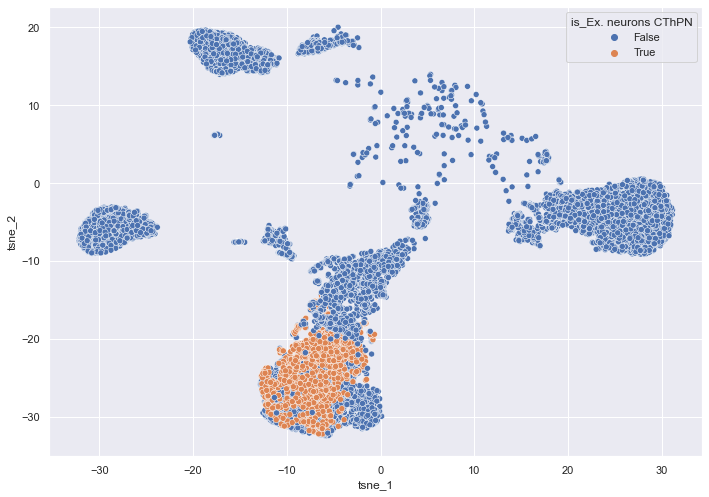

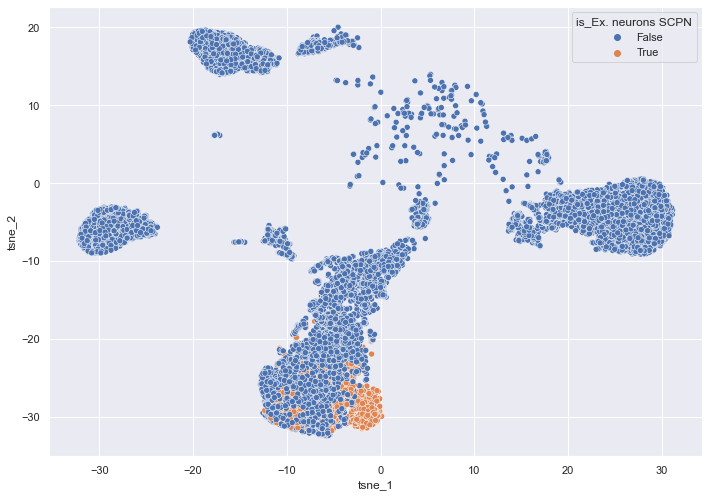

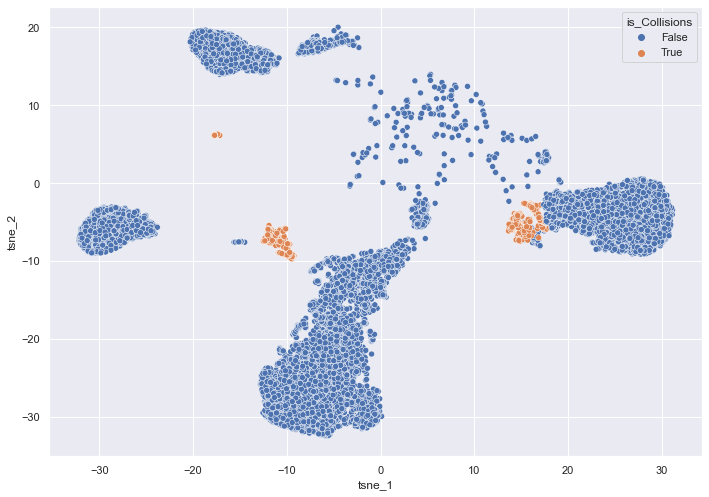

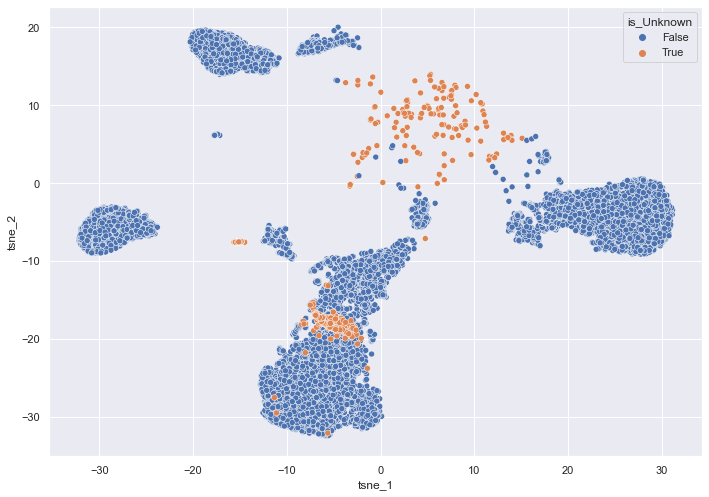

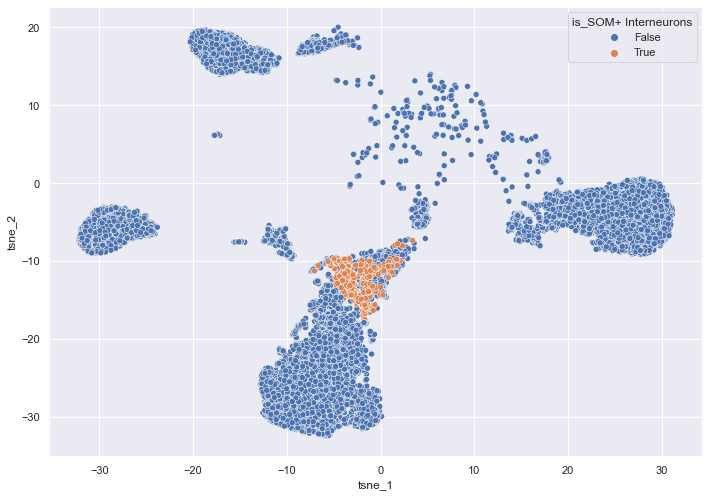

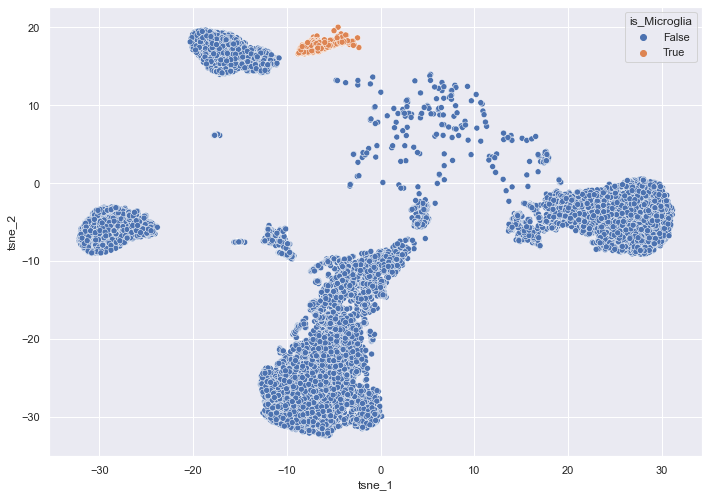

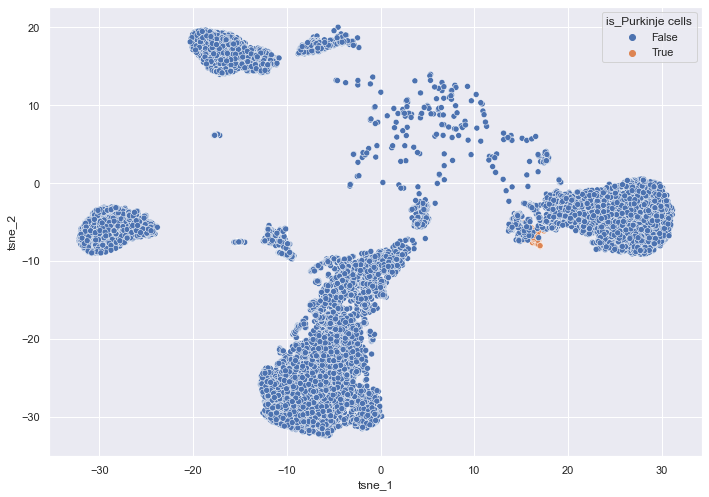

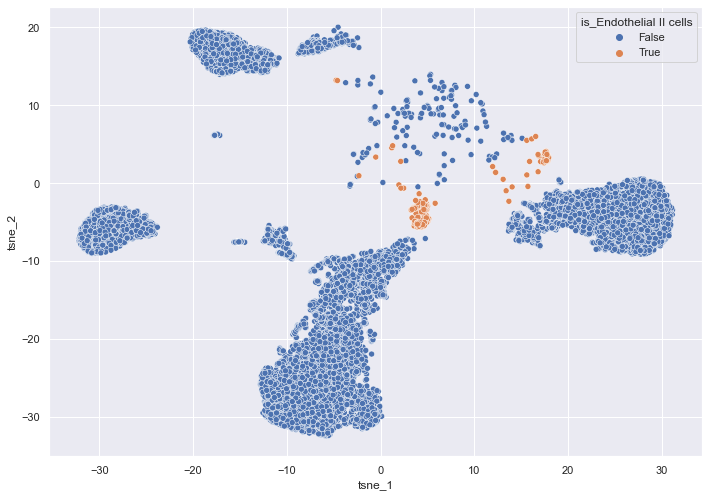

In [41]:
temp = atac_anno.copy()
for c in temp.cell_label.value_counts().index:
    fig, ax = plt.subplots()
    temp['is_%s' % c] = temp.cell_label == c
    sns.scatterplot(x='tsne_1', y='tsne_2', data=temp, hue='is_%s' % c, ax=ax)

In [45]:
rna_facs_anno.columns

Index(['Neurog3>0_raw', 'Neurog3>0_scaled', 'cell', 'cell_ontology_class',
       'cell_ontology_id', 'cluster.ids', 'free_annotation', 'mouse.id',
       'mouse.sex', 'plate.barcode', 'subsetA', 'subsetA_cluster.ids',
       'subsetB', 'subsetB_cluster.ids', 'subsetC', 'subsetC_cluster.ids',
       'subsetD', 'subsetD_cluster.ids', 'subsetE', 'subsetE_cluster.ids',
       'subtissue', 'tissue', 'tissue_tSNE_1', 'tissue_tSNE_2'],
      dtype='object')

<AxesSubplot:xlabel='tissue_tSNE_1', ylabel='tissue_tSNE_2'>

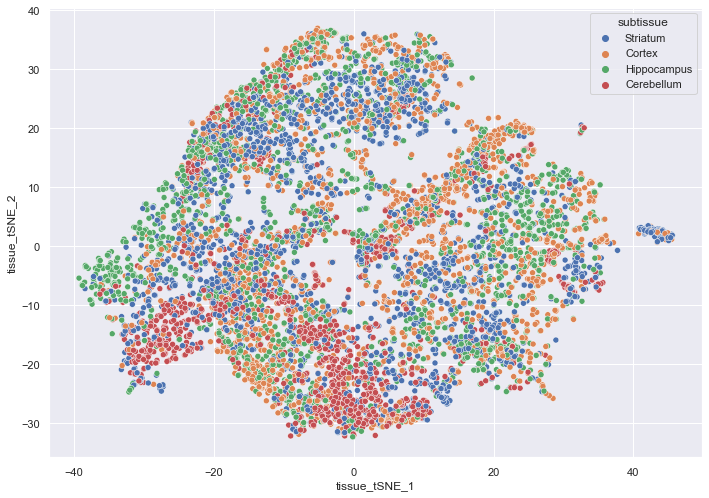

In [50]:
sns.scatterplot(x='tissue_tSNE_1', y='tissue_tSNE_2', data=rna_facs_anno, hue='subtissue')

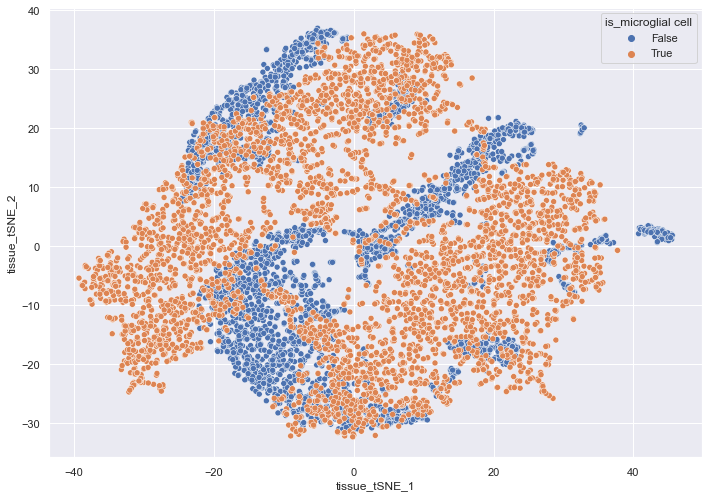

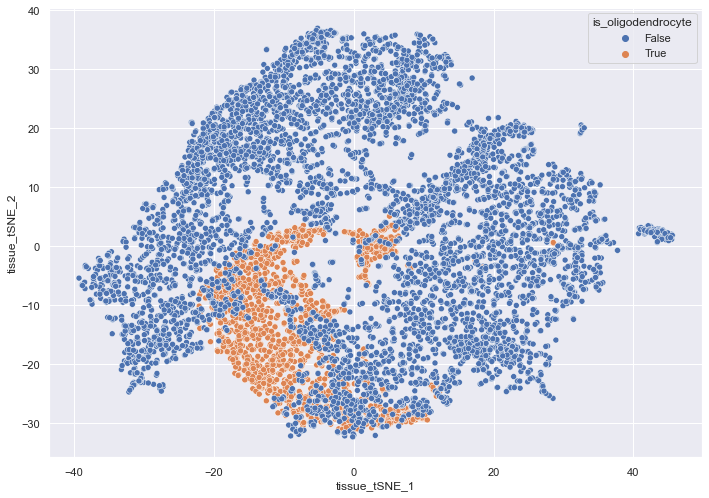

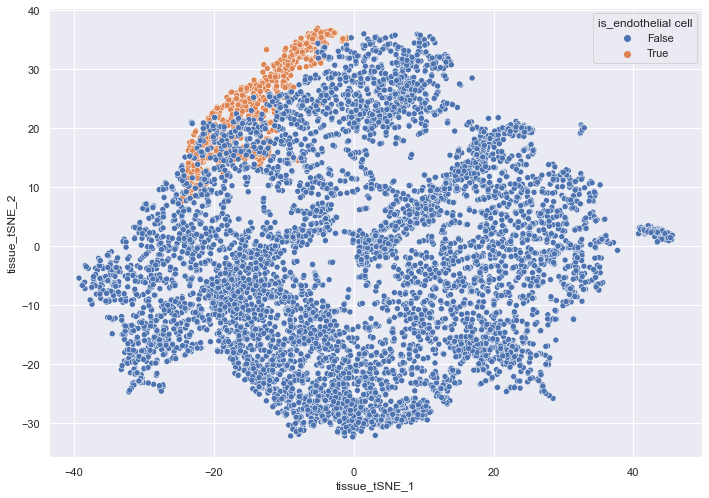

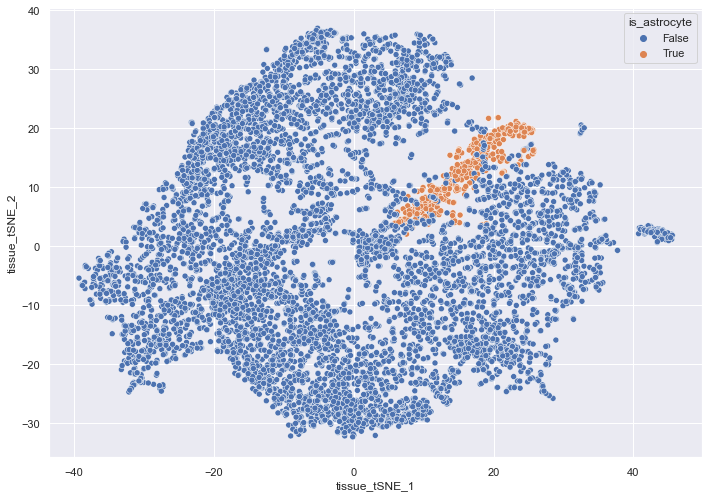

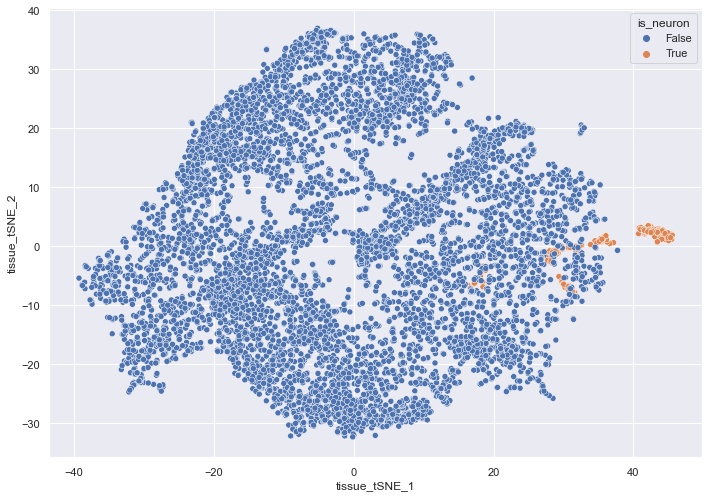

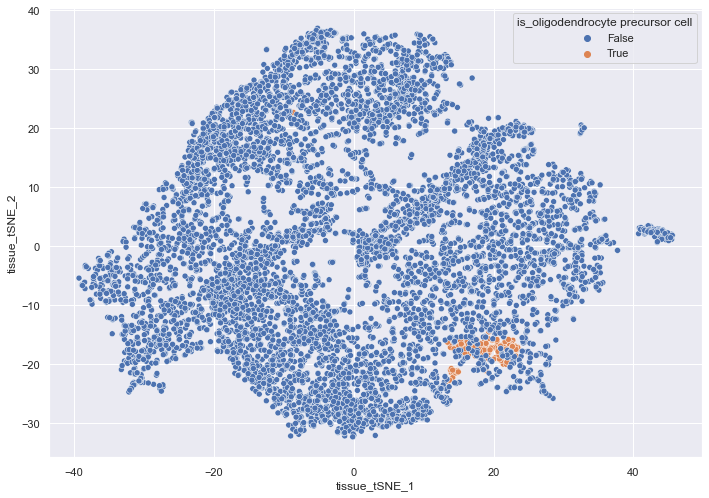

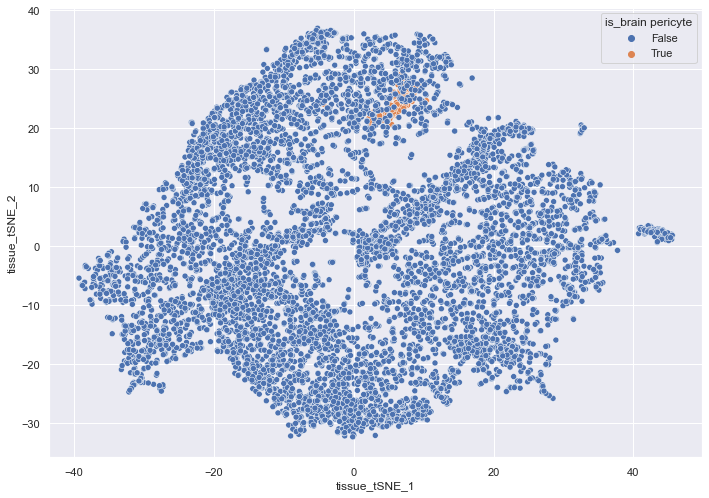

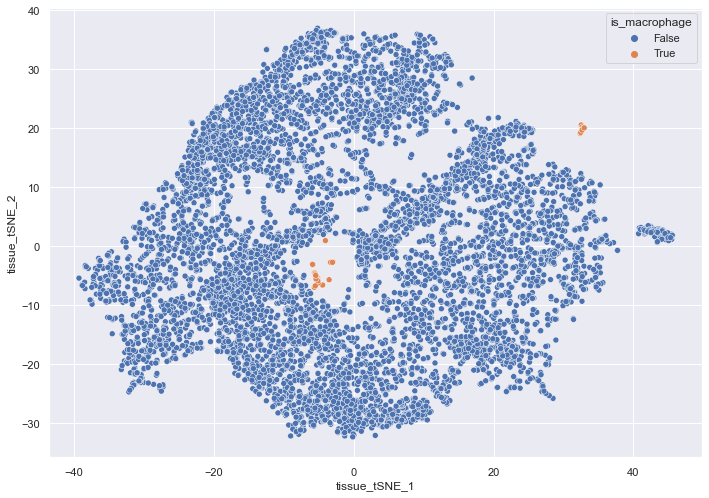

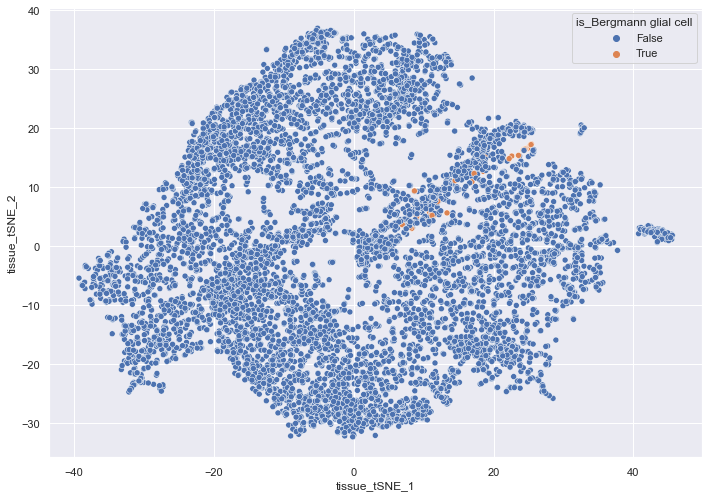

In [43]:
temp = rna_facs_anno.copy()
for c in temp.cell_ontology_class.value_counts().index:
    fig, ax = plt.subplots()
    temp['is_%s' % c] = temp.cell_ontology_class == c
    sns.scatterplot(x='tissue_tSNE_1', y='tissue_tSNE_2', data=temp, hue='is_%s' % c, ax=ax)

In [83]:
# Rename cells in ATAC
rename_atac = {'Ex. neurons CPN': 'Neuron',
               'Ex. neurons CThPN': 'Neuron',
               'Ex. neurons SCPN': 'Neuron',
               'Inhibitory neurons': 'Neuron',
               'SOM+ Interneurons': 'Neuron',
               'Purkinje cells': 'Neuron',
               'Cerebellar granule cells': 'Neuron',  
               'Astrocytes': 'Astrocyte',
               'Oligodendrocytes': 'Oligodendrocyte',
               'Endothelial II cells': 'Endothelial cell', 
               'Collisions': 'Collision'
}
atac_anno['annotation'] = atac_anno.cell_label.replace(rename_atac)

In [84]:
# Rename cells in RNA FACS
rename_rna_facs = {'neuron': 'Neuron', 
                   'astrocyte': 'Astrocyte',
                   'Bergmann glial cell': 'Astrocyte',
                   'oligodendrocyte': 'Oligodendrocyte',
                   'endothelial cell': 'Endothelial cell',
                   'microglial cell': 'Microglia',
                   'brain pericyte': 'Pericyte',
                   'macrophage': 'Macrophage',
                   'oligodendrocyte precursor cell': 'OPC',
}
rna_facs_anno['annotation'] = rna_facs_anno.cell_ontology_class.replace(rename_rna_facs)

In [85]:
atac_anno.annotation.value_counts()

Neuron              11601
Astrocyte            1663
Oligodendrocyte      1555
Collision             770
Unknown               562
Microglia             417
Endothelial cell      306
Name: annotation, dtype: int64

In [86]:
rna_facs_anno.annotation.value_counts()

Microglia           4394
Oligodendrocyte     1574
Endothelial cell     715
Astrocyte            472
Neuron               281
OPC                  203
Pericyte             156
Macrophage            61
Name: annotation, dtype: int64

In [87]:
atac_anno.annotation.value_counts().index.difference(rna_facs_anno.annotation.value_counts().index)

Index(['Collision', 'Unknown'], dtype='object')

In [88]:
rna_facs_anno.annotation.value_counts().index.difference(atac_anno.annotation.value_counts().index)

Index(['Macrophage', 'OPC', 'Pericyte'], dtype='object')

In [89]:
atac_anno.annotation.value_counts().index.intersection(rna_facs_anno.annotation.value_counts().index)

Index(['Neuron', 'Astrocyte', 'Oligodendrocyte', 'Microglia',
       'Endothelial cell'],
      dtype='object')

In [93]:
# Save
atac_anno.to_csv('%s/ATAC/cell_metadata.tissue_freq_filtered_brain.txt' % folder)
rna_facs_anno.to_csv('%s/RNA/annotations_facs_brain.csv' % folder)